### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
# Check column names with NA values  
na_columns = data.columns[data.isnull().any()].tolist()
print("Columns with NaN values:", na_columns)

# Find count of NA values per column
na_summary = data.isnull().sum()
print(na_summary[na_summary>0])

Columns with NaN values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Drop the car column as 12576/12578 columns are NAN
df_clean = data.drop(columns=['car'])

# Mark all age 50plus as 51 
df_clean['age'] = df_clean['age'].replace('50plus','51')
# Mark all age below21 as 20 
df_clean['age'] = df_clean['age'].replace('below21','20')
# Convert age column from object to int64 
df_clean['age'] = pd.to_numeric(df_clean['age'])




# Fill NAN values in Bar , CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) with 0 
df_clean['Bar'] = df_clean['Bar'].fillna('0')
df_clean['CoffeeHouse'] = df_clean['CoffeeHouse'].fillna('0')
df_clean['CarryAway'] = df_clean['CarryAway'].fillna('0')
df_clean['RestaurantLessThan20'] = df_clean['RestaurantLessThan20'].fillna('0')
df_clean['Restaurant20To50'] = df_clean['Restaurant20To50'].fillna('0')

# Replace never values in Bar , CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) with 0
df_clean['Bar'] = df_clean['Bar'].replace('never','0')
df_clean['CoffeeHouse'] = df_clean['CoffeeHouse'].replace('never','0')
df_clean['CarryAway'] = df_clean['CarryAway'].replace('never','0')
df_clean['RestaurantLessThan20'] = df_clean['RestaurantLessThan20'].replace('never','0')
df_clean['Restaurant20To50'] = df_clean['Restaurant20To50'].replace('never','0')


# Replace less1 values in Bar , CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) with never
df_clean['Bar'] = df_clean['Bar'].replace('less1','0')
df_clean['CoffeeHouse'] = df_clean['CoffeeHouse'].replace('less1','0')
df_clean['CarryAway'] = df_clean['CarryAway'].replace('less1','0')
df_clean['RestaurantLessThan20'] = df_clean['RestaurantLessThan20'].replace('less1','0')
df_clean['Restaurant20To50'] = df_clean['Restaurant20To50'].replace('less1','0')


# Replace 1~3 in Bar , CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) with 3
df_clean['Bar'] = df_clean['Bar'].replace('1~3','3')
df_clean['CoffeeHouse'] = df_clean['CoffeeHouse'].replace('1~3','3')
df_clean['CarryAway'] = df_clean['CarryAway'].replace('1~3','3')
df_clean['RestaurantLessThan20'] = df_clean['RestaurantLessThan20'].replace('1~3','3')
df_clean['Restaurant20To50'] = df_clean['Restaurant20To50'].replace('1~3','3')

# Replace 4~8 in Bar , CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) with 8
df_clean['Bar'] = df_clean['Bar'].replace('4~8','8')
df_clean['CoffeeHouse'] = df_clean['CoffeeHouse'].replace('4~8','8')
df_clean['CarryAway'] = df_clean['CarryAway'].replace('4~8','8')
df_clean['RestaurantLessThan20'] = df_clean['RestaurantLessThan20'].replace('4~8','8')
df_clean['Restaurant20To50'] = df_clean['Restaurant20To50'].replace('4~8','8')

# Replace gt8 in Bar , CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) with 10
df_clean['Bar'] = df_clean['Bar'].replace('gt8','10')
df_clean['CoffeeHouse'] = df_clean['CoffeeHouse'].replace('gt8','10')
df_clean['CarryAway'] = df_clean['CarryAway'].replace('gt8','10')
df_clean['RestaurantLessThan20'] = df_clean['RestaurantLessThan20'].replace('gt8','10')
df_clean['Restaurant20To50'] = df_clean['Restaurant20To50'].replace('gt8','10')

# Convert Bar, CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) to numeric 
df_clean['Bar'] = pd.to_numeric(df_clean['Bar'])
df_clean['CoffeeHouse'] = pd.to_numeric(df_clean['CoffeeHouse'])
df_clean['CarryAway'] = pd.to_numeric(df_clean['CarryAway'])
df_clean['RestaurantLessThan20'] = pd.to_numeric(df_clean['RestaurantLessThan20'])
df_clean['Restaurant20To50'] = pd.to_numeric(df_clean['Restaurant20To50'])

4. What proportion of the total observations chose to accept the coupon?



In [7]:
# Total number of recorded observations 
total_observations= df_clean.shape[0]
# Total number of accepted coupons
total_accepted = df_clean[df_clean['Y']==1].shape[0]
# Proprtion of total that chose to accept 
accepted_proportion = total_accepted/total_observations
print("Accepted proportion of total is",accepted_proportion)
print('\n')
print("Percentage of coupon acceptance is",accepted_proportion*100)

Accepted proportion of total is 0.5684326710816777


Percentage of coupon acceptance is 56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

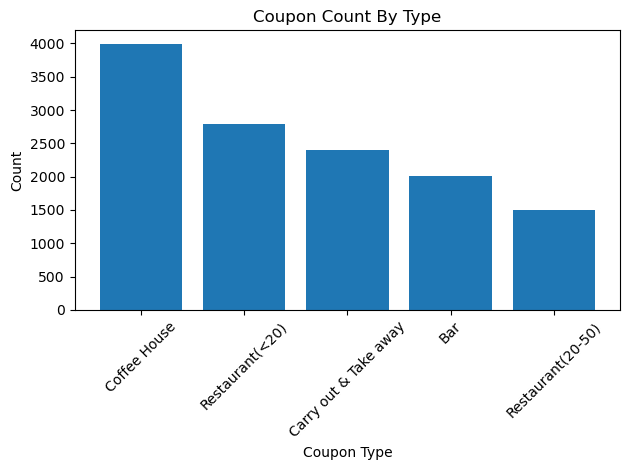

In [9]:
# Compute the value counts on the coupon column
value_counts = df_clean['coupon'].value_counts()
# Create a bar plot
plt.bar(value_counts.index, value_counts.values)
# Add x and y labels 
plt.xlabel('Coupon Type')
plt.ylabel('Count')
# Add a title 
plt.title('Coupon Count By Type')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the image in images directory
plt.savefig('images/coupon_type_by_count.png')

6. Use a histogram to visualize the temperature column.

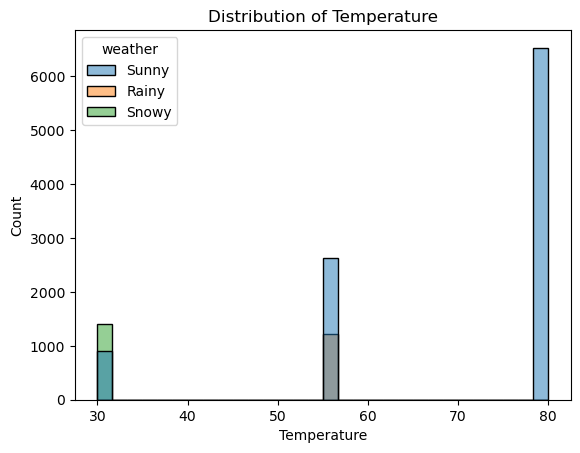

In [10]:
sns.histplot(data=df_clean, x='temperature', bins=30, hue='weather')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.savefig('images/temperature_distribution')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
# Filter coupons of type Bar
df_clean_bar = df_clean[df_clean['coupon']=='Bar']


2. What proportion of bar coupons were accepted?


In [12]:
# Total number of bar coupons
df_clean_bar_total = df_clean_bar.shape[0]

# Count of accepted bar coupons
df_clean_bar_accepted = df_clean_bar[df_clean_bar['Y']==1].shape[0]

#Proprtion of accepted bar coupons
bar_accepted_proprtion = df_clean_bar_accepted/df_clean_bar_total
print("Proportion of accepted bar coupons of total is", bar_accepted_proprtion)
print('\n')
print("Percentage acceptance of bar coupons of total is", bar_accepted_proprtion*100)

Proportion of accepted bar coupons of total is 0.41001487357461575


Percentage acceptance of bar coupons of total is 41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
# Acceptance rate of 3 or fewer bar visits
accepted_three_or_below_visits = df_clean_bar[df_clean_bar['Bar']<=3]['Y'].mean()
# Acceptance rate of those who went more
accepted_above_three_visits = df_clean_bar[df_clean_bar['Bar']>3]['Y'].mean()

print("Acceptance percentage for three or below bar visits is",accepted_three_or_below_visits*100)
print("Acceptance percentage for above three bar visits is",accepted_above_three_visits*100)

Acceptance percentage for three or below bar visits is 37.073707370737075
Acceptance percentage for above three bar visits is 76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
# Drivers who go to a bar more than once and are over age of 25
acceptance_more_one_25 = df_clean_bar[(df_clean_bar['age']> 25) \
               & (df_clean_bar['Bar']>1)]['Y'].mean()
acceptance_others = df_clean_bar[~((df_clean_bar['age']> 25) \
               & (df_clean_bar['Bar']>1))]['Y'].mean()
print("Acceptance percentage for above 1 bar visit and age more than 25 is:",acceptance_more_one_25*100)
print('\n')
print("Acceptance percentage for all other bar visitors is:",acceptance_others*100)

Acceptance percentage for above 1 bar visit and age more than 25 is: 69.52380952380952


Acceptance percentage for all other bar visitors is: 33.500313087038194


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [43]:
# Drivers who go to bars more than once a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry
driver_rate_3 = df_clean_bar[(df_clean_bar['Bar']>1) \
               & (~df_clean_bar['passanger'].isin(['Kid(s)'])) \
               & (~df_clean_bar['occupation'].isin(['farming','fishing','forestry']))]['Y'].mean()

print("percentage acceptance for drivers who go to bars more than once a month and had passengers and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to all others is",driver_rate_3*100)

percentage acceptance for drivers who go to bars more than once a month and had passengers and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to all others is 71.32486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [48]:
# Drivers go to bars more than once a month, had passengers 
# that were not a kid, and were not widowed
driver_rate_6_1 = df_clean_bar[(df_clean_bar['Bar']>1) \
               & (~df_clean_bar['passanger'].isin(['Kid(s)'])) \
               & (~df_clean_bar['maritalStatus'].isin(['Widowed']))]['Y'].mean()

# Drivers who go to bars more than once a month and are under the age of 30 
driver_rate_6_2 = df_clean_bar[(df_clean_bar['Bar']>1) \
               & (df_clean_bar['age'] < 30)]['Y'].mean()

# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K 
driver_rate_6_3 = df_clean_bar[(df_clean_bar['RestaurantLessThan20']>4) \
               & (df_clean_bar['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))]['Y'].mean()

print("Percentage acceptance for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is",driver_rate_6_1*100 )
print('\n')
print("Percentage acceptance for drivers who go to bars more than once a month and are under the age of 30 is",driver_rate_6_2*100)
print('\n')
print("Percentage acceptance for drivers who to cheap restaurants more than 4 times a month and income is less than 50K is",driver_rate_6_3*100)


Percentage acceptance for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 71.32486388384754


Percentage acceptance for drivers who go to bars more than once a month and are under the age of 30 is 72.17391304347827


Percentage acceptance for drivers who to cheap restaurants more than 4 times a month and income is less than 50K is 45.348837209302324


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

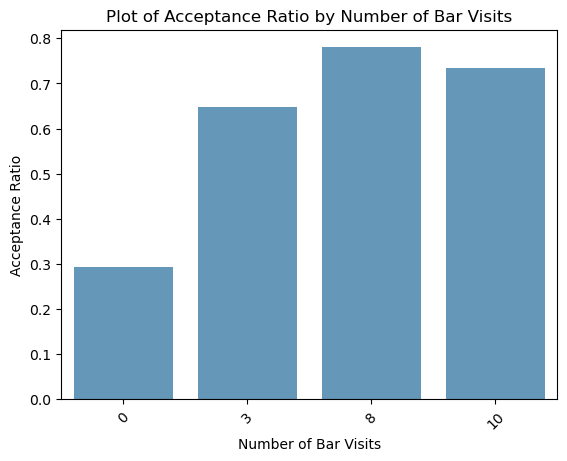

Based on above observations and the plot , drivers who visit bars more often are more likely to accept bar coupons


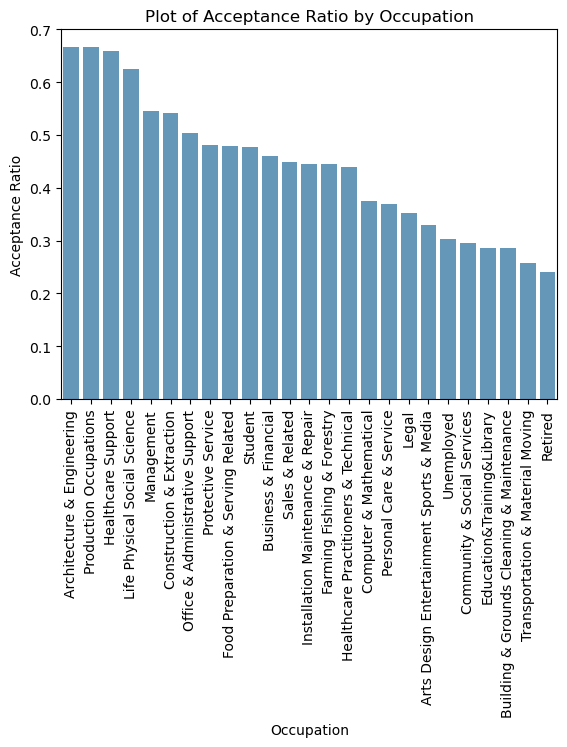

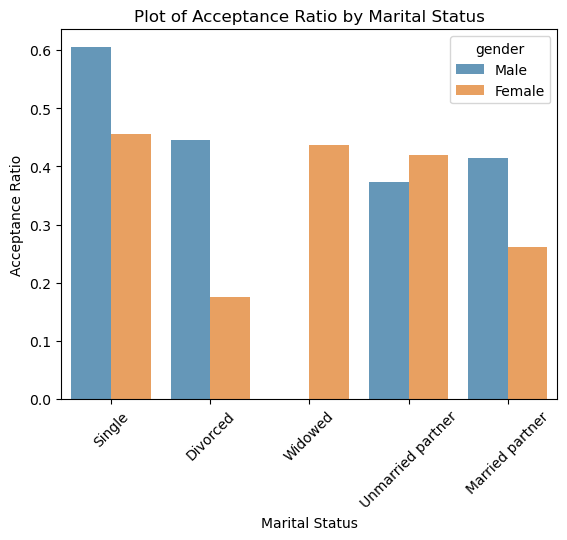

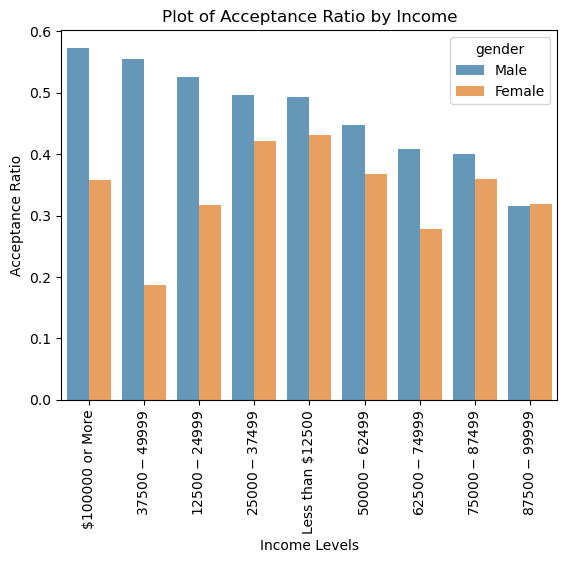

In [50]:
bar_acceptance_rates = df_clean_bar.groupby('Bar')['Y'].agg(['mean','count'])
bar_acceptance_rates.columns = ['Acceptance Rate','Total Coupons']
bar_acceptance_rates = bar_acceptance_rates.sort_values('Acceptance Rate',ascending=False)
bar_acceptance_rates = bar_acceptance_rates.reset_index()
sns.barplot(data=bar_acceptance_rates, x ='Bar', y ='Acceptance Rate', alpha=0.75)
plt.title('Plot of Acceptance Ratio by Number of Bar Visits')
plt.xlabel('Number of Bar Visits')
plt.ylabel('Acceptance Ratio')
plt.xticks(rotation=45)

plt.savefig('images/acceptance_ratio_by_bar_visits.png')
plt.show()
print('Based on above observations and the plot , drivers who visit bars more often are more likely to accept bar coupons')

occupation_acceptance_rates = df_clean_bar.groupby('occupation')['Y'].agg(['mean','count'])
occupation_acceptance_rates.columns = ['Acceptance Rate','Total Coupons']
occupation_acceptance_rates = occupation_acceptance_rates.sort_values('Acceptance Rate',ascending=False)
occupation_acceptance_rates = occupation_acceptance_rates.reset_index()
sns.barplot(data=occupation_acceptance_rates, x ='occupation', y ='Acceptance Rate', alpha=0.75)
plt.title('Plot of Acceptance Ratio by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Acceptance Ratio')
plt.xticks(rotation=90)
plt.savefig('images/acceptance_ratio_by_occuptation.png')
plt.show()

gender_acceptance_rates = df_clean_bar.groupby(['gender','maritalStatus'])['Y'].agg(['mean','count'])
gender_acceptance_rates.columns = ['Acceptance Rate','Total Coupons']
gender_acceptance_rates = gender_acceptance_rates.sort_values('Acceptance Rate',ascending=False)
gender_acceptance_rates = gender_acceptance_rates.reset_index()
sns.barplot(data=gender_acceptance_rates, x ='maritalStatus', y ='Acceptance Rate', alpha=0.75, hue ='gender')
plt.title('Plot of Acceptance Ratio by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Ratio')
plt.xticks(rotation=45)
plt.savefig('images/acceptance_ratio_by_marital_status.png')
plt.show()

income_acceptance_rates = df_clean_bar.groupby(['income','gender'])['Y'].agg(['mean','count'])
income_acceptance_rates.columns = ['Acceptance Rate','Total Coupons']
income_acceptance_rates = income_acceptance_rates.sort_values('Acceptance Rate',ascending=False)
income_acceptance_rates = income_acceptance_rates.reset_index()
sns.barplot(data=income_acceptance_rates, x ='income', y ='Acceptance Rate', alpha=0.75, hue ='gender')
plt.title('Plot of Acceptance Ratio by Income')
plt.xlabel('Income Levels')
plt.ylabel('Acceptance Ratio')
plt.xticks(rotation=90)
plt.savefig('images/acceptance_ratio_by_income.png')
plt.show()



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [26]:
# Filter coupons of type Coffee House
df_clean_coffee_house = df_clean[df_clean['coupon']=='Coffee House']

# Total number of bar coupons
df_clean_coffee_house_total = df_clean_coffee_house.shape[0]

# Count of accepted bar coupons
df_clean_coffee_house_accepted = df_clean_coffee_house[df_clean_coffee_house['Y']==1].shape[0]

#Proprtion of accepted bar coupons
ch_accepted_proportion = df_clean_coffee_house_accepted/df_clean_coffee_house_total
print("Proportion of accepted coofee house coupons of total is", ch_accepted_proportion)
print('\n')
print("Percentage acceptance of coffee house coupons of total is", ch_accepted_proportion*100)

Proportion of accepted coofee house coupons of total is 0.49924924924924924


Percentage acceptance of coffee house coupons of total is 49.92492492492492


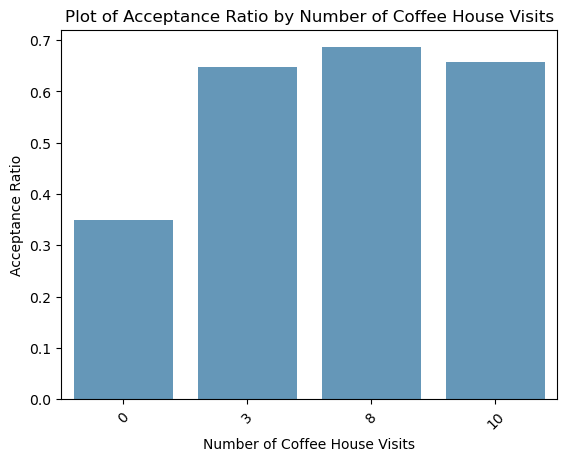

In [27]:
ch_acceptance_rates = df_clean_coffee_house.groupby('CoffeeHouse')['Y'].agg(['mean','count'])
ch_acceptance_rates.columns = ['Acceptance Rate','Total Coupons']
ch_acceptance_rates = ch_acceptance_rates.sort_values('Acceptance Rate',ascending=False)
ch_acceptance_rates = ch_acceptance_rates.reset_index()
sns.barplot(data=ch_acceptance_rates, x ='CoffeeHouse', y ='Acceptance Rate', alpha=0.75)
plt.title('Plot of Acceptance Ratio by Number of Coffee House Visits')
plt.xlabel('Number of Coffee House Visits')
plt.ylabel('Acceptance Ratio')
plt.xticks(rotation=45)
plt.savefig('images/acceptance_ratio_by_coffee_house_visits')